# Ejercicios *Learning from data*

## Ejercicio 1.2

Supongamos que usamos un perceptrón para detectar mensajes de spam. Digamos que cada mensaje de correo electrónico está representado por la frecuencia de ocurrencia de las palabras clave, y el resultado es si el mensaje se considera **spam**.

- ¿Puedes pensar en algunas palabras clave que terminarán con un gran peso positivo en el perceptrón?

- ¿Qué hay de las palabras clave que obtendrán un peso negativo?

- ¿Qué parámetro en el perceptrón afecta directamente cuántos mensajes límite terminan clasificándose como spam?

### Solución

- Sorpresa, regalo, misterio, gratis, horóscopo.

- Adjunto, cordialmente, solicitado, atentamente.

- La unidad de sesgo o parámetro constante en el perceptrón (b), afecta directamente la cantidad de mensajes límite que terminan siendo clasificados como spam, porque es el umbral que determina cómo se clasifican los mensajes por el modelo de perceptrón. Modificarlo tiene el mismo efecto en la clasificación de mensajes límite que están igualmente distantes del modelo de línea recta inicial del perceptrón.

## Ejercicio 1.3

La regla de actualización de peso $\mathbf{w}(t+1) = \mathbf{w}(t) + y(t)\mathbf{x}(t)$ tiene la buena interpretación de que se mueve en la dirección de clasificar correctamente.

- Muestre que

$$
    y(t)\mathbf{w}^T (t) \mathbf{x}(t) < 0. 
$$

- Muestre que

$$
    y(t)\mathbf{w}^T(t+1)\mathbf{x}(t) > y(t) \mathbf{w}^T(t)\mathbf{x}(t)
$$


- En lo que respecta a la clasificación, argumenta que el paso de $\mathbf{w}(t)$ a $\mathbf{w}(t+1)$ es un paso 'en la dirección correcta'.

### Solución

- De acuerdo al algoritmo basta con que consideremos un elemento mal clasificado, consideremos $x(t)$ está mal clasificado, esto es, $sign(\mathbf{w}(t)^Tx(t)) \neq y(t)$ entonces, como signos distintos dan menos obtenemos

$$
    y(t)\mathbf{w}(t)^Tx(t)  < 0
$$

- De acuerdo con la regla de actualización de peso tenemos 

$$
    \begin{aligned}
y(t) \mathbf{w}(t+1)^{T} \mathbf{x}(t) &=y(t)\left(\mathbf{w}(t)^{T} \mathbf{x}(t)+y(t) \mathbf{x}(t)^{T} \mathbf{x}(t)\right)\\
&=y(t) \mathbf{w}(t)^{T} \mathbf{x}(t)+y(t)^{2} \mathbf{x}(t)^{T} \mathbf{x}(t) \\
&=y(t) \mathbf{w}(t)^{T} \mathbf{x}(t)+\mathbf{x}(t)^{T} \mathbf{x}(t) \\
&>y(t) \mathbf{w}(t)^{T} \mathbf{x}(t).
\end{aligned}
$$

Como queríamos ver.

- En el ítem anterior tenemos que en cada iteración de $\mathbf{w}$ el producto $y(t) \mathbf{w}(t+1)^{T} \mathbf{x}(t)$ incrementa, con lo cual en el caso en que tenemos que iterar ocurre:
     - Si $y(t) = 1$  y $\mathbf{w}(t+1)^{T} \mathbf{x}(t) < 0$, el crecer implica que la iteración va hacia el valor positivo, o lo que podemos llamar "ir en la posición correcta".
     - Si $y(t) = -1$  y $\mathbf{w}(t+1)^{T} \mathbf{x}(t) > 0$, el crecer implica que la iteración va hacia el valor negativo o que decrece, con lo cual "va en la dirección correcta".
     
  En cualquier caso observamos que la iteración "va en la dirección correcta".

## Ejercicio 1.10

Aquí hay un experimento que ilustra la diferencia entre un solo contenedor y múltiples contenedores. Ejecute una simulación por computadora para lanzar 1000 monedas justas. Lanza cada moneda de forma independiente 10 veces. Centrémonos en 3 monedas de la siguiente manera:
 $c_1$ es la primera moneda lanzada; $c_{rand}$ es una moneda que eliges al azar; $c_{min}$ es la moneda que tuvo la frecuencia mínima de caras (elija la anterior en caso de empate). Sea $\nu, \nu_1$ t $\nu_{min}$ la fracción de caras que obtengas por las respectivas tres monedas.

- ¿Cuál es para las tres monedas seleccionadas?

- Repita todo este experimento una gran cantidad de veces (por ejemplo, 100000 ejecuciones de todo el experimento) para obtener varias instancias de $\nu_1 , \nu_{rand}, \nu_{min}$ y grafique los histogramas de las distribuciones de $\nu_1 , \nu_{rand}$ y $\nu_{min}$. Note qué monedas terminan siendo $c_{rand}$ y $c_{min}$ y puede diferir de una carrera a otra.

- Usando el ítem anterior grafique las estimaciones de $\mathbb{P}[|\nu - \mu|> \epsilon]$ como una función de $\epsilon$ junto con la cota de Hoeffding $2e^{-2\epsilon^2 N}$ (en el mismo gráfico).

- ¿Qué monedas obedecen la cota de Hoeffding y cuáles no? Explique por qué.

- Relacione el inciso anterior con los contenedores múltiples de la figura 1.10.

### Solución

- Procedemos a desarrollar el código del programa

In [1]:
# Definimos una función para lanzar cierta cantidad de veces
function Lanzar_Monedas(monedas, veces)
    lista = [ [i] for i in 1:monedas]
    for i in 1:monedas
        # Cara: 1 - Sello: 0
        Moneda_i = zeros(veces) 
        probs = rand(veces)
        for j in 1:length(probs)
           if probs[j]>=0.5
           Moneda_i[j]=1        
           end            
        end
        lista[i] = Moneda_i
    end
    
    return lista
end;


#Definimos una función para obtener la frecuencia de caras
function Num_cara(lista, imoneda)
    c = lista[imoneda]
    v=0
    for i in c
        if i==1
        v+=1
        end
    end
    return v
end;


# Definimos una función para obtener las frecuencias v de las monedas c1, crand, cmin
function get_v(fl_coins)
    monedas = length(fl_coins)
    r = rand(1:monedas)
    nrand = Num_cara(fl_coins, r)
    n1 = Num_cara(fl_coins, 1)
    nmin = n1
    cmin = 1
    for i in 2:length(fl_coins)
    ni = Num_cara(fl_coins,i)
    if ni<nmin
       nmin=ni        
       cmin=i 
    end
        
    end
    return Any[1 n1/10; r nrand/10; cmin nmin/10]
end;

# Simulamos los 1000 lanzamientos 10 veces cada uno
sim_1 = Lanzar_Monedas(1000,10);

using LaTeXStrings
using DataFrames
using PrettyTables

# Obtenemos las frecuencias de la simulación
v_sim_1=get_v(sim_1);

print(v_sim_1)

DFSim_1 = DataFrame("Nombre" => ["c_1", "c_rand", "c_min"], 
    "Cantidad"=> [v_sim_1[1,1], v_sim_1[2,1], v_sim_1[3,1]], 
    "Freq Caras"=> [v_sim_1[1,2], v_sim_1[2,2], v_sim_1[3,2]])

print("\n")
pretty_table(DFSim_1, nosubheader=true)

Any[1 0.5; 136 0.4; 56 0.1]
┌────────┬──────────┬────────────┐
│ Nombre │ Cantidad │ Freq Caras │
├────────┼──────────┼────────────┤
│    c_1 │        1 │        0.5 │
│ c_rand │      136 │        0.4 │
│  c_min │       56 │        0.1 │
└────────┴──────────┴────────────┘


- ¿Cuál es $\mu$ para las tres monedas seleccionadas?

Para las tres monedas seleccionadas $\mu=0.5$, ya que esa es la probabilidad de obtener cara después de lanzar una moneda justa, y cada lanzamiento se realiza de forma independiente.

- Implementamos el siguiente código para ejecutar 100 000 veces el experimento anterior y obtener vectores de $v_1$, $v_
{rand}$ y $v_{min}$.

In [2]:
# Corremos el experimento 100 000 veces para obtener v1, vrand, vmin

v1= []
vrand, vmin, crand, cmin= copy(v1), copy(v1), copy(v1), copy(v1)

for i in 1:3
    
    sim_i=Lanzar_Monedas(1000,10)
    VCsim_i=get_v(sim_i);
    
    push!(v1,VCsim_i[1,2])
    push!(vrand,VCsim_i[2,2])
    push!(vmin,VCsim_i[3,2])
    
    push!(crand, VCsim_i[2,1])
    push!(cmin, VCsim_i[3,1])
    
end;

for i in 4:100000
    
    sim_i=Lanzar_Monedas(1000,10)
    VCsim_i=get_v(sim_i);
    
    push!(v1,VCsim_i[1,2])
    push!(vrand,VCsim_i[2,2])
    push!(vmin,VCsim_i[3,2])
end;

Grafiamos las frecuencias de $\nu_1, \nu_{rand}$ y $\nu_{min}$

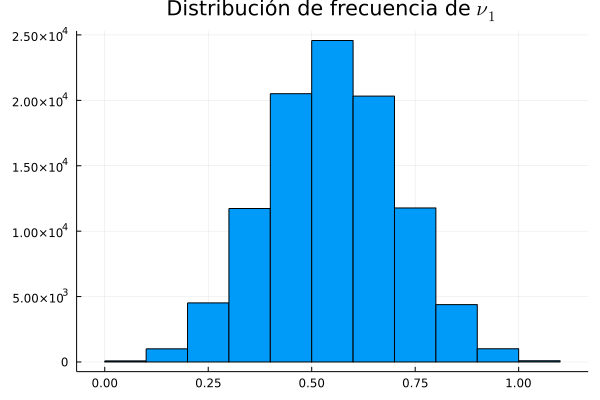

In [3]:
using Plots
hv1=histogram(v1, nbins=11, title=L"Distribución de frecuencia de $\nu_1$", legend = false)

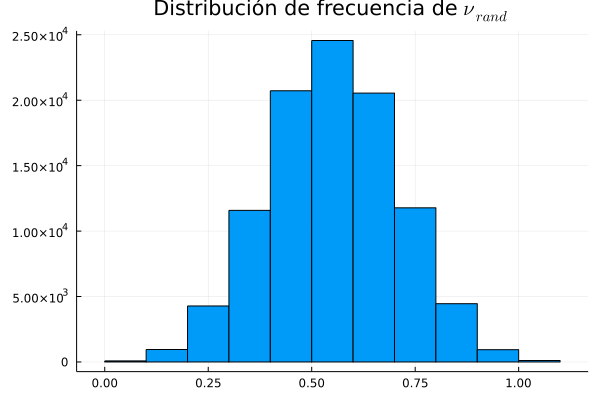

In [4]:
hvrand=histogram(vrand, nbins=11, title=L"Distribución de frecuencia de $\nu_{rand}$", legend = false)

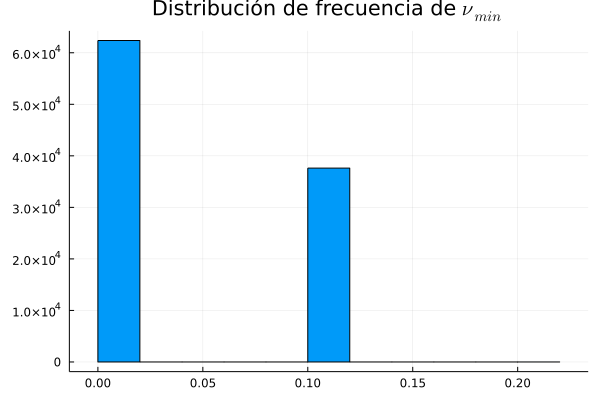

In [5]:
hvmin= histogram(vmin, nbins=11,  title=L"Distribución de frecuencia de $\nu_{min}$", legend = false)

In [6]:
println(L"$c_{min}$ of first three runs: ")

for i in 1:3
    println(i,": ", cmin[i])
end

println(L"$c_{rand}$ of first three runs: ")
for i in 1:3
    println(i,": ", crand[i])
end

$c_{min}$ of first three runs: 
1: 18
2: 23
3: 356
$c_{rand}$ of first three runs: 
1: 33
2: 272
3: 272


In [7]:
DFSim_1 = DataFrame(L"c_{min}"=> [cmin[1], cmin[2], cmin[3]], L"c_{rand}"=>[crand[1], crand[2], crand[3]])

pretty_table(DFSim_1, nosubheader=true)

┌───────────┬────────────┐
│ $c_{min}$ │ $c_{rand}$ │
├───────────┼────────────┤
│        18 │         33 │
│        23 │        272 │
│       356 │        272 │
└───────────┴────────────┘


Por lo tanto, pueden diferir de una ejecución a otra.

- Dado que cada frecuencia $\nu$ corresponde a una muestra de 10 puntos de datos, la cota de Hoeffding en este experimento estará dado por $\mathbb{P}[|\nu-\mu|>\epsilon]<2 e^{-20 \epsilon^{2}}$. Ahora, para algunos valores de $\epsilon >0$, trazamos la cota de Hoeffding junto con nuestras estimaciones resultantes para $\mathbb{P}[|\nu_1-\mu|]$, $\mathbb{P}[|\nu_{rand}-\mu|]$ y $\mathbb{P}[|\nu_{min}-\mu|]$ que corresponde a $c_1, c_{rand}$ y $c_{min}$ respectivamente.

┌ Warning: Skipped marker arg o.
└ @ Plots C:\Users\LaraJ\.julia\packages\Plots\mnkn4\src\args.jl:1231


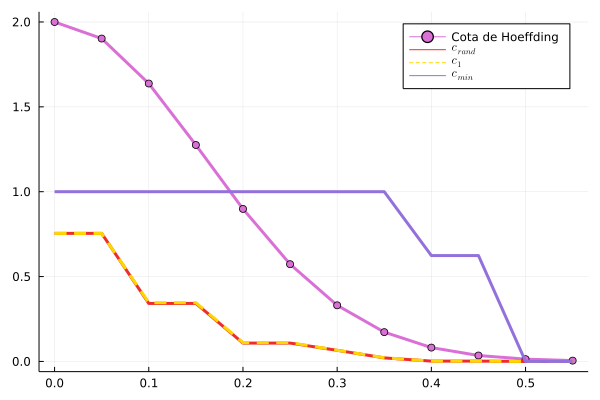

In [8]:
epsi=0:0.05:0.55
Ev1=abs.(v1.-0.5)
Evrand=abs.(vrand.-0.5)
Evmin=abs.(vmin.-0.5)

p1,prand,pmin= [], [], []
for i in epsi
    p1    =push!(p1   ,sum(Ev1.>i))
    prand =push!(prand   ,sum(Evrand.>i))
    pmin  =push!(pmin   ,sum(Evmin.>i))
end

p1    =p1/100000;
prand =prand/100000;
pmin  =pmin /100000;

HoeffIneq=2*exp.((epsi.^2).*(-20));
pminTit=L"$\mathbb{P}[|\nu-\mu|>\epsilon]$"

plot(epsi, HoeffIneq, marker="o", markerfacecolor="blue", label="Cota de Hoeffding",color="orchid",lw = 3)
plot!(epsi, prand, label=L"c_{rand}",color="firebrick2",lw = 3)
plot!(epsi, p1, label=L"c_{1}", color="gold",lw = 3, line=:dash)

plot!(epsi, pmin, label=L"c_{min}", color="mediumpurple",lw = 3)

- Las monedas que obedecieron a la Desigualdad de Hoeffding son la primera moneda ($c_{1}$) y la moneda aleatoria ($c_{rand}$), mientras que la moneda con la mínima frecuencia de caras ($c_{min}$) no. Esto sucede porque cuando lanzamos la primera moneda diez veces, estamos recolectando una muestra aleatoria de diez puntos de datos que siguen la distribución binomial con $p=0.5$. Es decir, de un contenedor cuya mitad de bolas son verdes, estamos recolectando una muestra de diez bolas, por lo que la probabilidad de que la diferencia entre $\mu$ y $\nu$ sea mayor que ciertamente seguirá la cota de Hoeffding. Lo mismo ocurre con la moneda que se elige al azar.

    Sin embargo, la moneda con la frecuencia mínima no se elige al azar en cada ejecución del experimento. Del conjunto de monedas, que son todas muestras de diez puntos de datos (los resultados de lanzar las monedas), seleccionamos la que tiene menos , y de una muestra grande de 1000 dividida por algunas submuestras de 10 puntos de datos, la probabilidad de al menos menos uno de ellos tiene $\nu\leq 0.1$, o simplemente una baja frecuencia aumenta drásticamente que solo considerar una sola muestra aleatoria.


- La forma en que el experimento anterior se relaciona con los contenedores múltiples es la siguiente. Cada una de las 1000 monedas representa una muestra extraída de un contenedor de bolas infinitas, cada una de las cuales tiene la posibilidad de $50\%$ de ser verde o roja. Después $c_{1}$ y $c_{rand}$ son muestras aleatorias del contenedor y, por lo tanto, la desigualdad de Hoeffding se cumple para ellas. Ahora, la forma en que seleccionamos la moneda $c_{min}$ cada vez es siempre considerando todas las monedas (muestras) y eligiendo la que tiene menos (la que tiene menos caras, o la que tiene el máximo número de bolas verdes). Como el contenedor tiene infinitas bolas, podemos considerarlo de la misma manera que lo haríamos con 1000 contenedores iguales y, por lo tanto, el proceso de seleccionar $\nu_{min}$ es el mismo que el caso que tuvimos con los bins múltiples.

## Ejercicio 1.11

Dado un conjunto de datos $\mathcal{D}$ con 25 ejemplos de entrenamiento para una función objetivo desconocida $f : \mathcal{x} \to \mathcal{y}$, donde $\mathcal{x} = \mathbb{R}$ y $\mathcal{y} = \{-1,+1\}$. Para aprender $f$, usamos un conjunto de hipótesis simple $\mathcal{H} = \{h_1 , h_2\}$ donde $h_1$ es la constante $+1$ y $h_2$ es la constante $-1$.

Consideramos dos algoritmos de aprendizaje, $S$ (inteligente) y $C$ (loco). $S$ escoge la hipótesis que más coincide con $\mathcal{D}$  y $C$ escoge la hipótesis deliberadamente. Veamos cómo funcionan estos algoritmos fuera de muestra desde los puntos de vista determinista y probabilístico. Suponga en la vista probabilística que hay una distribución de probabilidad en $\mathcal{x}$, y sea $\mathbb{P}[f(x) = +1]= p$.

- ¿Puede $S$ producir una hipótesis que garantice un mejor desempeño que el aleatorio en cualquier punto fuera de $D$?
- Suponga para el resto del ejercicio que todos los ejemplos en $D$ tienen $y_n=+1$. ¿Es posible que la hipótesis que produce $C$ resulte ser mejor que la hipótesis que produce $S$?
- Si $p= 0.9$, ¿cuál es la probabilidad de que $S$ produzca una hipótesis mejor que $C$.
- ¿Hay algún valor de $p$ para el cual es más probable que $C$ no producirá una hipótesis mejor que $S$?

### Solución

- No, el conjunto de datos puede no ser presentativos para conocer la función $f$, el único caso que funciona es cuando $p=1$.
- Sí, es posible.
- La probabilidad de que esto ocurra es la suma de las probabilidades de los casos en los que esto ocurra, por lo cual es 
$$
    \sum_{i=13}^{25} \binom{25}{i} \left( \frac{9}{10} \right)^i \left( \frac{1}{10} \right)^{25-i}
$$
Calculamos dicha probabilidad:

In [9]:
Σ = 0
for i in 13:25
   Σ = Σ + binomial(25,i) * (9/10)^i * (1/10)^(25-i)
end

print("La probabilidad de que S produzca una mejor hipótesis es $Σ.")

La probabilidad de que S produzca una mejor hipótesis es 0.9999998379165848.

- No, la probabilidad de que $C$ produzca una hipótesis mejor que $S$ siempre es menor que en el caso contrario, sin importar el valor que tome $p$.

## Ejercicio 1.12

Un amigo acude a usted con un problema de aprendizaje. Ella dice que la función objetivo $f$ es completamente desconocida, pero tiene 4000 puntos de datos. Ella está dispuesta a pagarle para que resuelva su problema y produzca para ella una $g$ que se aproxime a $f$. ¿Qué es lo mejor que le puedes prometer entre lo siguiente?

- Después de aprender, le proporcionará una $g$ que garantizará que se aproxima $f$ bien fuera de la muestra.

- Después de aprender, le proporcionará una $g$, y con alta probabilidad la $g$ que produzca se aproximará mucho a $f$ fuera de la muestra.

- Ocurrirá una de dos cosas. (i) Producirá una hipótesis $g$; (ii) Declararás que has fallado.

Si devuelve una hipótesis $g$, entonces con alta probabilidad la $g$ que produzca se aproximará mucho a $f$ fuera de la muestra.

### Solución

Lo mejor que se puede prometer es la tercera opción, ya que no podría encontrar nada que sea $100\%$ seguro sobre la función $f$ fuera de la muestra, y por otra parte tampoco puedo garantizar que desde mi espacio de hipótesis lo haré encontrar una función que se aproxime lo suficientemente bien dentro de la muestra.